# Exercise1 - Linear Regression

### Scenario: Profits for Food Truck
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.You would like to use this data to help you select which city to expand to next.

The first column of the training data is the population of a city and the second column is the profit of a food truck in that city.

Here, we will implement linear regression with one variable(Population) to predict profits for a food truck.



In [1]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#This is a magic command. It will display the plotting image directly below the code cell
%matplotlib inline  

In [2]:
dataFilePath = os.getcwd() + '/Data/ex1data1.txt'
data = pd.read_csv(dataFilePath, names = ['Population','Profit'])

data.head() #by default displays first 5 rows. head(n) displays first 'n' rows

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


**It is often useful to understand the data by visualizing it.**

Text(0.5,1,'Scatter plot of training data')

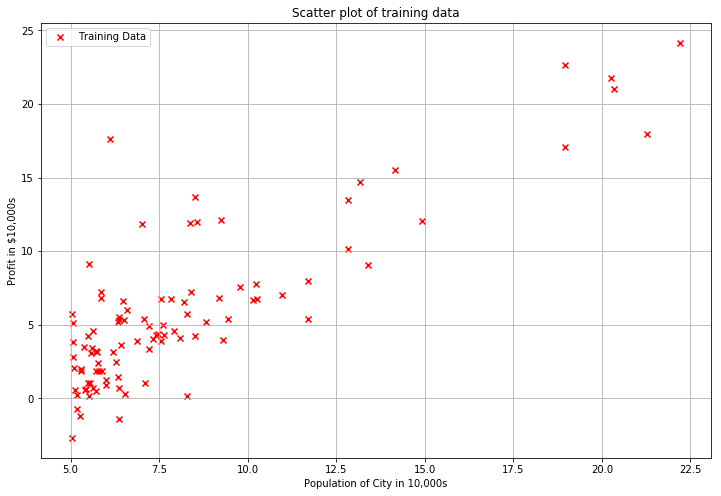

In [3]:
# 2 methods of plotting the below graph.

#Method 1
#trainingData.plot(kind = 'scatter', x = 'Population', y = 'Profit',color= 'r',marker= 'x',label= 'Training Data', figsize = (12,8))

#Method 2
figure,axes = plt.subplots(figsize= (12, 8))  
axes.scatter(data.Population, data.Profit,c = 'r', marker= 'x', label = 'Training Data')

axes.grid(True) #Displays the grid format in the plot
axes.legend() #Displays the legend

axes.set_xlabel('Population of City in 10,000s') 
axes.set_ylabel('Profit in $10,000s')
axes.set_title('Scatter plot of training data')


## Cost Function
$ J(\Theta ) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})^{2} $


$ h_{\Theta }\left (X \right ) = \Theta ^{T}X = \Theta _{0} + \Theta _{1}x_{1} $

In [4]:
def computeCost(X, y, theta):
    m = y.size
    h_theta_x = X * theta.T 
    squared_error = np.square(h_theta_x - y)
    J_theta = (1/ (2*m)) * np.sum(squared_error)
    return J_theta    

**We add a column of ones to the training data so that we can use a Vectorized solution in computing Cost Function and Gradient Descent.**

$ h_{\Theta }\left (X \right ) = \Theta ^{T}X = \Theta _{0}x_{0} + \Theta _{1}x_{1} $

In [5]:
data.insert(0, 'Ones',1)
cols = data.shape[1]

X = data.iloc[:, 0:cols-1]
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [6]:
y = data.iloc[:, cols-1:cols]
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [7]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([0,0])

In [8]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

**Cost of the solution with $\Theta$ initialised to zeros.**

In [9]:
computeCost(X, y, theta)

32.072733877455676

## Gradient Decent

$\Theta_{j} := \Theta_{j} - \alpha \frac{1}{m}\sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$
  (simultaneous update of $\Theta_{j}$ for all j)

With each step of gradient descent, the parameters $\Theta_{j}$ comes closer to the optimal values that will achieve the lowest cost $J(\Theta)$.

In [10]:
def gradientDescent(X, y, theta, alpha= 0.01, num_iters= 1500):
    m = y.size
    J_theta_history = np.zeros(num_iters)
    temp = np.matrix(np.zeros(theta.shape))
    for iter in range(num_iters):
        h_theta_x = X * theta.T
        error = h_theta_x - y
        for i in range(theta.size):
            temp[:,i] = theta[:,i] - (alpha/m) * np.sum(np.multiply(error, X[:,i]))
        
        theta = temp
        J_theta_history[iter] = computeCost(X,y, theta)
    return theta, J_theta_history
        

**We can check if the gradient descent is working fine by looking at the values of $J(\Theta)$ and check that it is decreasing with each step. $J(\Theta)$ should never increase and it should converge to a steady value by the end of the algorithm.**

Minimised theta:  [[-3.63029144  1.16636235]]


Text(0.5,1,'Convergence of the Cost Function ( $J(\\Theta)$ )')

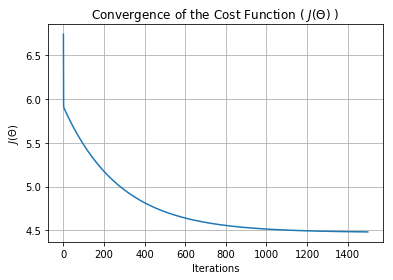

In [11]:
minimised_theta , J_theta = gradientDescent(X, y, theta)
print('Minimised theta: ',minimised_theta.ravel())

plt.plot(J_theta)
plt.grid(True)

plt.ylabel('$J(\Theta)$')
plt.xlabel('Iterations');
plt.title('Convergence of the Cost Function ( $J(\Theta)$ )')

Text(0.5,1,'Predicted Profit vs. Population Size')

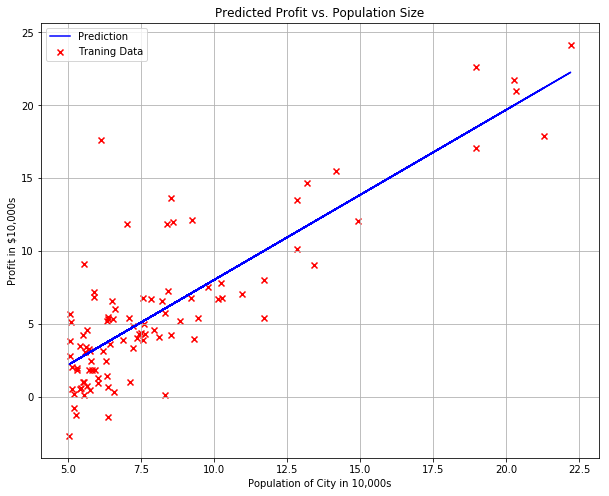

In [12]:
X_data =  data.Population
hypothesis = minimised_theta[0, 0] + (minimised_theta[0, 1] * X_data)

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(X_data, hypothesis, 'b', label='Prediction')
ax.scatter(data.Population, data.Profit, color= 'r', marker= 'x',label='Traning Data')

ax.legend(loc=2)
ax.grid(True)

ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')


## Linear Regression using Scikit- learn

In [13]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
    
regr.fit(X[:,1], y) # Train the model using the training sets

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Comparing the results of our implementation with the scikit-learn **

In [16]:
# Prediction of profit for a city with population of 47000
# hypothesis = minimised_theta[0, 0] + (minimised_theta[0, 1] * X_data)

print('Prediction of profit for a city with population of 47000')
our_prediction = minimised_theta[0, 0] + (minimised_theta[0, 1] * 4.7)
print('Our implementation: $', our_prediction*10000)
sci_prediction = regr.predict(4.7)
print('      Scikit-learn: $', sci_prediction[0][0]*10000)

Prediction of profit for a city with population of 47000
Our implementation: $ 18516.11607172875
      Scikit-learn: $ 17114.77249379241


In [15]:
# 2 methods of predicting the results using scikit-learn
#Method 1
prediction1 = regr.predict(4.7)
#Method 2
prediction2 = regr.intercept_+ regr.coef_* 4.7
print('Method1: $', prediction1*10000)
print('Method2: $', prediction2*10000)

Method1: $ [[17114.77249379]]
Method2: $ [[17114.77249379]]
